# 1. Tags 전처리

In [4]:
import pandas as pd
import numpy as np

In [19]:
# 크롤링 자료 불러오기
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [20]:
# 태그 모으기
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    
    for tag in tags_list:
        tags_total.append(tag)
        

In [21]:
# 빈도수 확인
from collections import Counter

tag_counts = Counter(tags_total)
tag_counts

Counter({'#제주핫플레이스': 835,
         '#제주여행': 3020,
         '#제주도여행': 1454,
         '#제주가볼만한곳': 497,
         '#제주도핫플': 183,
         '#제주여행코스': 89,
         '#제주공항': 306,
         '#제주도맛집': 3149,
         '#제주맛집': 3412,
         '#제주스냅': 145,
         '#제주풍경': 54,
         '#제주사진': 14,
         '#제주카페': 600,
         '#제주도카페': 258,
         '#산굼부리': 39,
         '#제주도바다': 31,
         '#귤체험': 7,
         '#우도': 76,
         '#제주관광': 2827,
         '#제주도여향지': 1,
         '#제주여행중': 33,
         '#삼육오빠': 1,
         '#제주앓이': 37,
         '#제주핫플': 483,
         '#제주': 1538,
         '#제주도': 2053,
         '#여행': 436,
         '#제주맛집추천': 675,
         '#맛집추천': 44,
         '#제주디저트맛집': 2,
         '#제주데이트': 55,
         '#제주데이트코스': 108,
         '#고집돌우럭': 53,
         '#중문맛집': 404,
         '#감귤카페': 7,
         '#제주카페추천': 151,
         '#제주야시장': 78,
         '#맛집': 223,
         '#제주갈만한곳': 141,
         '#좋아요반사': 56,
         '#좋반': 31,
         '#제주도여행지': 146,
         '#제주도가볼만한곳': 1014,
 

In [22]:
# 상위 50개 호출
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#반영구', 405),
 ('#눈썹문신', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주자연눈썹', 397)]

In [23]:
# 불용어 설정
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹', '서귀포눈썹문신',
            '#제주눈썹문신', '#소통', '#맞팔', '#제주속눈썹', '#제주일상', '#여행스타그램', '#눈썹문신'
            , '#카멜리아힐', '#제주메이크업', '#제주반영구']

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_total_selected = Counter(tag_total_selected)
tag_total_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#서귀포남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포속눈썹', 395),
 ('#서귀포반영구', 395),
 ('#먹스타그램', 395),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#daily', 360),
 ('#가족여행', 356),
 ('#제주도여행코스', 350)]

# 2. Barplot 시각화

In [23]:
from matplotlib import rc

import matplotlib.pyplot as plt
import seaborn as sns
import sys

rc('font', family='malgun gothic')

In [25]:
# 새 DF 생성
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50))
tag_count_df.columns = ['tags', 'count']

# 공란 NaN 처리
tag_count_df['tags'].replace('', None, inplace=True)
tag_count_df.dropna(subset=['tags'], inplace=True)

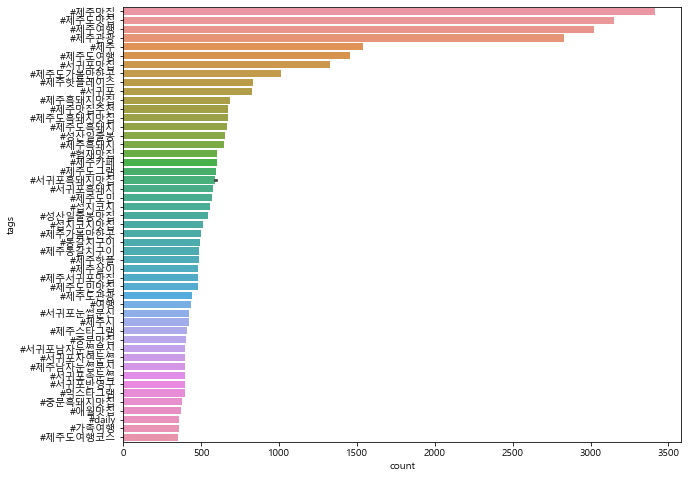

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='tags', data= tag_count_df)
plt.show()

# 3. 워드 클라우드 생성

In [2]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161112 sha256=5a530a906e47442b8ad3f131f459b4fc07b98fadae9d500c808cd009c78c4001
  Stored in directory: c:\users\gw\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
  Using cached wordcloud-1.8.1-cp39-cp39-win_amd64.whl


In [17]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import wordcloud
import platform

In [31]:
font_path = 'c://Windows/Fonts/malgun.ttf'

wordcloud = WordCloud(font_path = font_path, background_color='white',
                      width=400, height=200, relative_scaling=0.5,
                     max_words=100).generate_from_frequencies(tag_total_selected)

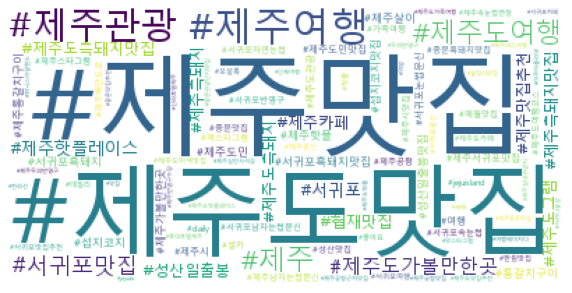

In [32]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('./files/2_tag-wordcloud.png')
plt.show()